<a href="https://colab.research.google.com/github/c4bath/cf820/blob/main/PatSurvLogRegNov2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8


In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
data=pd.read_csv(r'/content/drive/MyDrive/CIND820BigProject/Data/PatSurvRaw.csv',header=0)

In [8]:
print(data.shape)
print(list(data.columns))

(91713, 186)
['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age', 'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height', 'hospital_admit_source', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'readmission_status', 'weight', 'albumin_apache', 'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative', 'arf_apache', 'bilirubin_apache', 'bun_apache', 'creatinine_apache', 'fio2_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache', 'glucose_apache', 'heart_rate_apache', 'hematocrit_apache', 'intubated_apache', 'map_apache', 'paco2_apache', 'paco2_for_ph_apache', 'pao2_apache', 'ph_apache', 'resprate_apache', 'sodium_apache', 'temp_apache', 'urineoutput_apache', 'ventilated_apache', 'wbc_apache', 'd1_diasbp_invasive_max', 'd1_diasbp_invasive_min', 'd1_diasbp_max', 'd1_diasbp_min', 'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_invasi

In [10]:
# Eliminate features that do not provide any information value (i.e. 'encounter_id', 'patient_id', 'apache_4a_hospital_death_prob','apache_4a_icu_death_prob') OR are not of interest in our prediction and analysis (the physiological measures, i.e. 'bilirubin_apache','bun_apache','creatinine_apache', etc)
data.drop(['encounter_id','patient_id','readmission_status','albumin_apache','apache_2_diagnosis','apache_3j_diagnosis','apache_post_operative','arf_apache','bilirubin_apache','bun_apache','creatinine_apache','fio2_apache','glucose_apache','heart_rate_apache','hematocrit_apache','map_apache','paco2_apache','paco2_for_ph_apache','pao2_apache','ph_apache','resprate_apache','sodium_apache','temp_apache','urineoutput_apache','wbc_apache','d1_diasbp_invasive_max','d1_diasbp_invasive_min','d1_diasbp_max','d1_diasbp_min','d1_diasbp_noninvasive_max','d1_diasbp_noninvasive_min','d1_heartrate_max','d1_heartrate_min','d1_mbp_invasive_max','d1_mbp_invasive_min','d1_mbp_max','d1_mbp_min','d1_mbp_noninvasive_max','d1_mbp_noninvasive_min','d1_resprate_max','d1_resprate_min','d1_spo2_max','d1_spo2_min','d1_sysbp_invasive_max','d1_sysbp_invasive_min','d1_sysbp_max','d1_sysbp_min','d1_sysbp_noninvasive_max','d1_sysbp_noninvasive_min','d1_temp_max','d1_temp_min','h1_diasbp_invasive_max','h1_diasbp_invasive_min','h1_diasbp_max','h1_diasbp_min','h1_diasbp_noninvasive_max','h1_diasbp_noninvasive_min','h1_heartrate_max','h1_heartrate_min','h1_mbp_invasive_max','h1_mbp_invasive_min','h1_mbp_max','h1_mbp_min','h1_mbp_noninvasive_max','h1_mbp_noninvasive_min','h1_resprate_max','h1_resprate_min','h1_spo2_max','h1_spo2_min','h1_sysbp_invasive_max','h1_sysbp_invasive_min','h1_sysbp_max','h1_sysbp_min','h1_sysbp_noninvasive_max','h1_sysbp_noninvasive_min','h1_temp_max','h1_temp_min','d1_albumin_max','d1_albumin_min','d1_bilirubin_max','d1_bilirubin_min','d1_bun_max','d1_bun_min','d1_calcium_max','d1_calcium_min','d1_creatinine_max','d1_creatinine_min','d1_glucose_max','d1_glucose_min','d1_hco3_max','d1_hco3_min','d1_hemaglobin_max','d1_hemaglobin_min','d1_hematocrit_max','d1_hematocrit_min','d1_inr_max','d1_inr_min','d1_lactate_max','d1_lactate_min','d1_platelets_max','d1_platelets_min','d1_potassium_max','d1_potassium_min','d1_sodium_max','d1_sodium_min','d1_wbc_max','d1_wbc_min','h1_albumin_max','h1_albumin_min','h1_bilirubin_max','h1_bilirubin_min','h1_bun_max','h1_bun_min','h1_calcium_max','h1_calcium_min','h1_creatinine_max','h1_creatinine_min','h1_glucose_max','h1_glucose_min','h1_hco3_max','h1_hco3_min','h1_hemaglobin_max','h1_hemaglobin_min','h1_hematocrit_max','h1_hematocrit_min','h1_inr_max','h1_inr_min','h1_lactate_max','h1_lactate_min','h1_platelets_max','h1_platelets_min','h1_potassium_max','h1_potassium_min','h1_sodium_max','h1_sodium_min','h1_wbc_max','h1_wbc_min','d1_arterial_pco2_max','d1_arterial_pco2_min','d1_arterial_ph_max','d1_arterial_ph_min','d1_arterial_po2_max','d1_arterial_po2_min','d1_pao2fio2ratio_max','d1_pao2fio2ratio_min','h1_arterial_pco2_max','h1_arterial_pco2_min','h1_arterial_ph_max','h1_arterial_ph_min','h1_arterial_po2_max','h1_arterial_po2_min','h1_pao2fio2ratio_max','h1_pao2fio2ratio_min','apache_4a_hospital_death_prob','apache_4a_icu_death_prob'],axis =1, inplace = True)

In [11]:
data.shape

(91713, 31)

In [12]:
#Drop rows that have missing values in more than 2 columns
#df=df.dropna(thresh=len(df.columns)-2)
data=data.dropna(thresh=29)

In [13]:
data.shape

(88485, 31)

In [14]:
#drop the following features (reason)
#hospital_admit_source (over 20K missing values)
# i. weight and ii. height (these are both highly correlated with bmi, which is calculated as weigh(kg) / height(meters squared)
# apache_2_bodysystem (superseded by apache_3j_bodysystem)
data.drop(['hospital_admit_source','weight','height','apache_2_bodysystem'],axis =1, inplace = True)

In [15]:
#Impute missing quantitative variables with the mean
df1 = data
df1['age']=df1['age'].fillna(df1['age'].mean())
df1['bmi']=df1['bmi'].fillna(df1['bmi'].mean())
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88485 entries, 0 to 91712
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hospital_id                  88485 non-null  int64  
 1   hospital_death               88485 non-null  int64  
 2   age                          88485 non-null  float64
 3   bmi                          88485 non-null  float64
 4   elective_surgery             88485 non-null  int64  
 5   ethnicity                    87309 non-null  object 
 6   gender                       88474 non-null  object 
 7   icu_admit_source             88401 non-null  object 
 8   icu_id                       88485 non-null  int64  
 9   icu_stay_type                88485 non-null  object 
 10  icu_type                     88485 non-null  object 
 11  pre_icu_los_days             88485 non-null  float64
 12  gcs_eyes_apache              88485 non-null  float64
 13  gcs_motor_apache

In [16]:
#Impute missing categorical variables with the mode
df1=df1.fillna(df1.mode().iloc[0])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88485 entries, 0 to 91712
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   hospital_id                  88485 non-null  int64  
 1   hospital_death               88485 non-null  int64  
 2   age                          88485 non-null  float64
 3   bmi                          88485 non-null  float64
 4   elective_surgery             88485 non-null  int64  
 5   ethnicity                    88485 non-null  object 
 6   gender                       88485 non-null  object 
 7   icu_admit_source             88485 non-null  object 
 8   icu_id                       88485 non-null  int64  
 9   icu_stay_type                88485 non-null  object 
 10  icu_type                     88485 non-null  object 
 11  pre_icu_los_days             88485 non-null  float64
 12  gcs_eyes_apache              88485 non-null  float64
 13  gcs_motor_apache

In [22]:
data=df1
data['hospital_death'].value_counts()

0    81038
1     7447
Name: hospital_death, dtype: int64

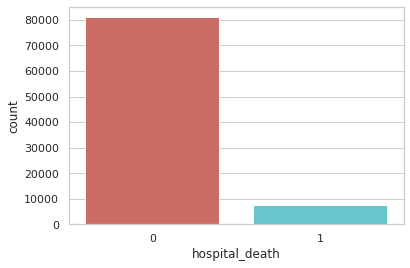

<Figure size 432x288 with 0 Axes>

In [23]:
sns.countplot(x='hospital_death',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [25]:
count_no_died = len(data[data['hospital_death']==0])
count_died = len(data[data['hospital_death']==1])
pct_of_no_died = count_no_died/(count_no_died+count_died)
print("percentage of did not die is", pct_of_no_died*100)
pct_of_died = count_died/(count_no_died+count_died)
print("percentage of died", pct_of_died*100)

percentage of did not die is 91.58388427417077
percentage of died 8.416115725829236


Our classes are imbalanced, and the ratio of did not die to died instances is 92:8. Before we go ahead to balance the classes, let’s do some more exploration.

In [26]:
data.groupby('hospital_death').mean()

,hospital_id,age,bmi,elective_surgery,icu_id,pre_icu_los_days,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
hospital_death,,,,,,,,,,,,,,,,,,,,
0,105.831733,61.809992,29.253740,0.195649,509.038895,0.791064,3.538945,5.580654,0.0,4.106493,0.129581,0.289222,0.000802,0.014314,0.228337,0.011711,0.024211,0.006306,0.003825,0.018646
1,105.565597,68.122204,28.319032,0.066470,510.422049,1.367902,2.653149,4.281187,0.0,2.758829,0.348462,0.668189,0.001343,0.032631,0.206526,0.028199,0.050356,0.015711,0.008326,0.045253


In [27]:
data.groupby('elective_surgery').mean()

,hospital_id,hospital_death,age,bmi,icu_id,pre_icu_los_days,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,intubated_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
elective_surgery,,,,,,,,,,,,,,,,,,,,
0,104.199473,0.096375,61.819939,29.117473,515.196340,0.684438,3.460484,5.462300,0.0,4.004117,0.120344,0.288029,0.000943,0.017731,0.226437,0.014986,0.027518,0.007791,0.004464,0.019852
1,112.911927,0.030275,64.641155,29.429205,482.502691,1.524226,3.481651,5.510948,0.0,3.944343,0.270031,0.467095,0.000428,0.007584,0.226789,0.004771,0.021529,0.004037,0.003058,0.025443


In [28]:
data.groupby('intubated_apache').mean()

,hospital_id,hospital_death,age,bmi,elective_surgery,icu_id,pre_icu_los_days,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,ventilated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
intubated_apache,,,,,,,,,,,,,,,,,,,,
0.0,105.048097,0.064360,62.232768,29.051784,0.158312,516.063723,0.786244,3.620701,5.664023,0.0,4.286355,0.203186,0.000783,0.015559,0.226067,0.012973,0.026954,0.007216,0.004324,0.021568
1.0,110.191509,0.198152,62.965647,29.884808,0.337126,469.385996,1.146831,2.564600,4.361790,0.0,2.304750,1.000000,0.001222,0.017563,0.229001,0.013821,0.023290,0.006414,0.003513,0.016952


In [29]:
data.groupby('ventilated_apache').mean()

,hospital_id,hospital_death,age,bmi,elective_surgery,icu_id,pre_icu_los_days,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,intubated_apache,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
ventilated_apache,,,,,,,,,,,,,,,,,,,,
0.0,104.418355,0.041135,61.862547,28.779439,0.145045,507.976827,0.693067,3.783639,5.855521,0.0,4.597776,0.0000,0.000749,0.016098,0.223036,0.013534,0.026619,0.007191,0.004345,0.022423
1.0,108.750053,0.175125,63.353248,30.011499,0.268776,511.646759,1.149427,2.789470,4.658971,0.0,2.714648,0.4609,0.001056,0.015345,0.233828,0.012177,0.025973,0.006898,0.003907,0.017632
